# Wisdom of the Tribe -- Descriptive Statistics
### Justin M. Olds [github.com/jmolds](https://github.com/jmolds)

**Project objectives:** 
* Identify film critics whose preferences align with a given person. 
* Provide film recommendations based on a person's "tribe" of likeminded critics.

**Data:**
* 165,332 critic reviews taken from [metacritic.com](https://www.metacritic.com)
* corresponding to 7689 films
* Reviews were scraped from [metacritic.com](https://www.metacritic.com) based on a list of 190,00 films obtained by scraping search results from [imdb.com](https://www.imdb.com) for the top 500 grossing films (in the US) for every year from 1980 to 2018. 

**Inital exploratory questions:**
* What is the average number of reviews per film, what does the distirbution of total reviews for each films look like?
* What is the average rating for films and what does distibutions of review averages look like?
* What is the average standard deviation of ratings for films, what does this distibution look like, and which films have the hightest amount of variance (largest standard deviation values)? 

In [120]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.signal import savgol_filter

pd.set_option('precision', 2)
np.set_printoptions(precision=2)

conn = sqlite3.connect("C:/Users/Justin/films_and_reviews2.db")
c = conn.cursor()

In [5]:
film_averages = pd.read_sql_query("""
    SELECT film_title, AVG(rating) AS RatingAVG, COUNT(*) as count, film_release_date, film_runtime, film_id
    FROM film INNER JOIN review USING(film_id)
    GROUP BY film_id
""", conn)
reviews = pd.read_sql_query("""
    SELECT *
    FROM review 
""", conn)
print(str(len(reviews)) + " critic reviews from " + str(len(film_averages)) + " films from 1980 to 2018.")

165332 critic reviews from 7689 films from 1980 to 2018.


In [141]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': '16',
         'figure.figsize': (12, 8),
         'axes.labelsize': '24',
         'axes.titlesize': '26',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18',
         'grid.linewidth': 2,
         'grid.color': 'white',
         'axes.labelcolor': '.15',
         'axes.edgecolor': '.15',
         'axes.facecolor': '#dee1ec',
         'legend.edgecolor': '0.15',
         'legend.facecolor': 'white',
         'legend.framealpha': 1,
         }
pylab.rcParams.update(params)
#pylab.rcParams.keys()

---
## What is the average number of reviews per film, what does the distirbution of total reviews for each films look like?

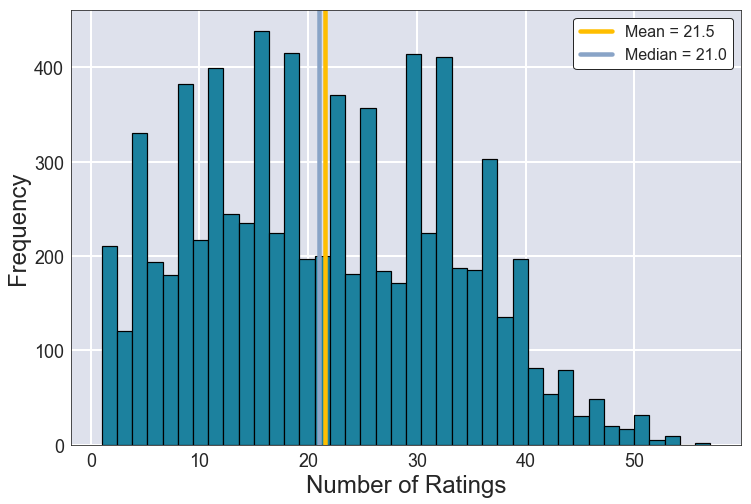

In [148]:
#matplotlib.rcParams['figure.figsize'] = [10, 7]
#matplotlib.rcParams['font.size']=18
np.set_printoptions(precision=2)
plt.hist(film_averages['count'], bins=40, color='#1c819e', edgecolor='black', linewidth=1.2)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(film_averages['count']), color="#ffbe00", linewidth=4.5, label='Mean = {0:.1f}'.format(np.mean(film_averages['count'])))
plt.axvline(x=np.median(film_averages['count']), color="#89a4c7", linewidth=4.5, label='Median = {0:.1f}'.format(np.median(film_averages['count'])))
plt.legend()
plt.show()

---
## What is the average rating for films and what does distibutions of review averages look like?

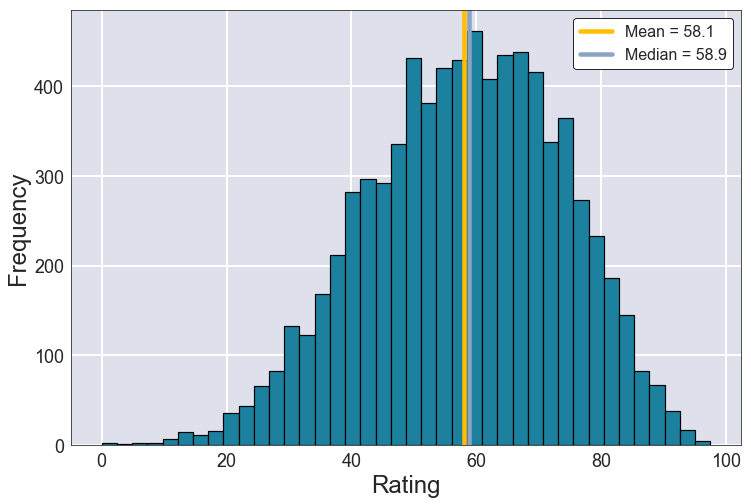

In [147]:
#matplotlib.rcParams['figure.figsize'] = [10, 7]
#matplotlib.rcParams['font.size']=18
plt.hist(film_averages['RatingAVG'], bins=40, color='#1c819e', edgecolor='black', linewidth=1.2)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(film_averages['RatingAVG']), color="#ffbe00", linewidth=4.5, label='Mean = {0:.1f}'.format(np.mean(film_averages['RatingAVG'])))
plt.axvline(x=np.median(film_averages['RatingAVG']), color="#89a4c7", linewidth=4.5, label='Median = {0:.1f}'.format(np.median(film_averages['RatingAVG'])))
plt.legend()
plt.show()

---
## What is the average standard deviation of ratings for films, what does this distibution look like, and which films have the hightest amount of variance (largest standard deviation values)?

This analysis requires that films with only a one rating be filtered out. Because films with only a few ratings are not of much interest for the current project, I will filter out films with fewer than 5 ratings.

First things first, rating standard deviation (SD) values need to be computed.

In [150]:
SDvalues = list()
import statistics as stats
for x in film_averages['film_id']:
    c.execute('SELECT rating FROM review INNER JOIN film USING(film_id) WHERE film_id=?', [x])
    individ_film_reviews = c.fetchall()
    temp_ratings_tuple = tuple([x[0] for x in individ_film_reviews])
    try:
        SDvalues.append(stats.stdev(temp_ratings_tuple))
    except:
        SDvalues.append(None)
film_averages = film_averages.assign(SD=SDvalues)

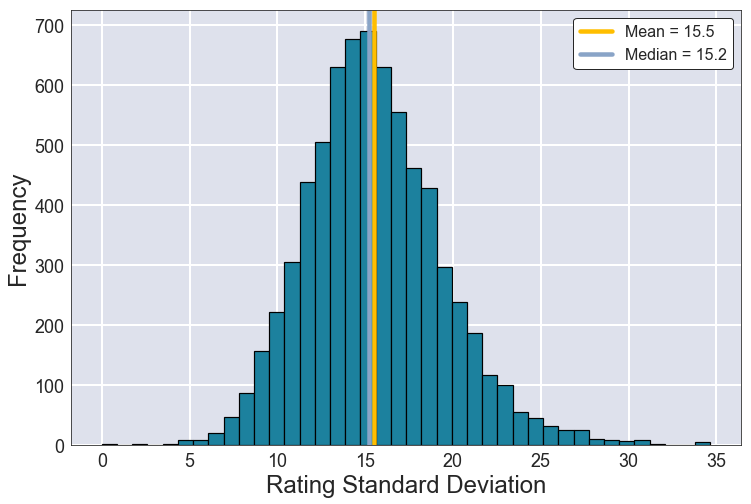

In [154]:
films_filt = film_averages.where(film_averages['count']>5)
films_filt = films_filt.dropna(0)
plt.hist(films_filt['SD'], bins=40, color='#1c819e', edgecolor='black', linewidth=1.2)
plt.xlabel('Rating Standard Deviation')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(films_filt['SD']), color="#ffbe00", linewidth=4.5, label='Mean = {0:.1f}'.format(np.mean(films_filt['SD'])))
plt.axvline(x=np.median(films_filt['SD']), color="#89a4c7", linewidth=4.5, label='Median = {0:.1f}'.format(np.median(films_filt['SD'])))
plt.legend()
plt.show()

In [170]:
films_filt2 = films_filt.where(films_filt['SD']>30)
films_filt2 = films_filt2.dropna(0)
print('Number of films with more than 5 reviews and SD > 30 is {}'.format(len(films_filt2['SD'])))
print(films_filt2[['film_title', 'count', 'RatingAVG', 'SD', 'film_release_date']].sort_values(by=['SD'],ascending=False))

Number of films with more than 5 reviews and SD > 30 is 15
                    film_title  count  RatingAVG     SD film_release_date
348    Pee-wee's Big Adventure   10.0      54.80  34.66        1985-08-09
632     The Accidental Tourist   10.0      56.80  34.21        1988-12-23
649                  They Live    9.0      49.33  34.00        1988-11-04
190                   Scarface    7.0      68.29  33.80        1983-12-09
3807                 Film Geek    8.0      45.75  31.81        2006-01-13
3830               Nowhere Man   10.0      44.00  30.98        2005-03-11
27                      Xanadu    7.0      51.43  30.89        1980-08-08
3118                  Dogville   39.0      63.79  30.77        2004-03-26
809     Joe Versus the Volcano   14.0      49.07  30.75        1990-03-09
5312            I'm Still Here   33.0      51.09  30.73        2010-09-10
43               Heaven's Gate   13.0      67.54  30.66        1980-11-19
138       Pink Floyd: The Wall    9.0      50.89  30.

In [7]:
import plotly.plotly as py
import plotly.tools as tls
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = [9, 7]

plt.hist(film_averages['RatingAVG'], bins=40)
fig = plt.gcf()
plotly_fig = tls.mpl_to_plotly( fig )
py.iplot(plotly_fig, filename='mpl-basic-histogram')

C:\Users\Justin\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead




Averages:
RatingAVG    58.08
dtype: float64



Mean of mean film ratings:
RatingAVG    58.08
dtype: float64

Standard Deviation of mean film ratings:
RatingAVG    15.61
dtype: float64


C:\Users\Justin\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



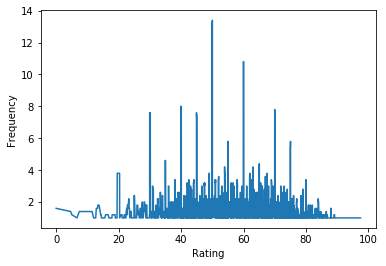

In [47]:
print('\nMean of mean film ratings:')
print(np.mean(film_averages[['RatingAVG']]))

print('\nStandard Deviation of mean film ratings:')
print(np.std(film_averages[['RatingAVG']]))

g = film_averages.groupby('RatingAVG')
info = g['RatingAVG'].agg(['sum','count']).reset_index()

plt.plot(info['RatingAVG'], savgol_filter(info['count'], 5, 1), label = 'Mean film rating') 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
hist_data = [df.RatingAVG]; group_labels = ['distplot']
fig = ff.create_distplot(hist_data, group_labels, bin_size=.5)
py.iplot(fig, filename='Basic Distplot')